Making a picture size converter in Python for use in documents.

In [9]:
from PIL import Image
import os, sys

size = 256, 256

im = Image.open("viber image.jpg")
im.thumbnail(size, Image.ANTIALIAS)
im.save("viber_thumb.jpg")

Importing the modules we will use 

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow import divide
import random

import tensorflow as tf
from tensorflow import keras

## Intro

In [11]:
print(tf.__version__)

2.2.0


In [12]:
x = tf.Variable(-1.0)

In [13]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.0>

In [14]:
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x, x)

In [15]:
tape

In [16]:
g = tape.gradient(y, x)
print(g.numpy())

-2.0


In [17]:
gray = tf.random.uniform([2, 2], maxval = 255, dtype = "int32")

In [18]:
gray

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[249, 213],
       [128,  20]], dtype=int32)>

In [19]:
gray = tf.reshape(gray, [2*2, 1])

In [20]:
gray

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[249],
       [213],
       [128],
       [ 20]], dtype=int32)>

In [21]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = tf.multiply(x, x)
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [22]:
model = np.array([[1],[0],[-1]], dtype = "float32")

In [23]:
model

array([[ 1.],
       [ 0.],
       [-1.]], dtype=float32)

In [24]:
letter = np.array([[1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.]], dtype="float32")

In [25]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (1*3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


## Linear Models

In [31]:
housing = pd.read_csv("kc_house_data.csv")

In [32]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
housing_array = np.array(housing)

In [34]:
price = np.array(housing["price"], np.float32)

In [35]:
price

array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      dtype=float32)

In [36]:
waterfront = np.array(housing["waterfront"], np.bool)

In [37]:
waterfront

array([False, False, False, ..., False, False, False])

We can do the same thing but with tensorflow insted of numpy

In [38]:
price = tf.cast(housing["price"], tf.float32)

In [39]:
price

<tf.Tensor: shape=(21613,), dtype=float32, numpy=
array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      dtype=float32)>

In [40]:
waterfront = tf.cast(housing["waterfront"], tf.bool)

In [41]:
waterfront

<tf.Tensor: shape=(21613,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

In [42]:
# Assign the path to a string variable named data_path
data_path = 'kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing["price"])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [43]:
# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


Let us play around with loss functions

In [57]:
price

array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      dtype=float32)

In [58]:
import random

In [65]:
predictions = []
for elem in price:
    predict = elem - (elem * random.uniform(0.001, 0.2))
    predictions.append(predict)

In [66]:
predictions = tf.cast(predictions, tf.float32)

In [67]:
predictions

<tf.Tensor: shape=(21613,), dtype=float32, numpy=
array([180739.45, 516416.2 , 146969.75, ..., 325173.06, 392968.3 ,
       315491.5 ], dtype=float32)>

In [68]:
# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

5756883500.0


In [69]:
# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

54314.434


In [74]:
# Initialize a variable named scalar
scalar = tf.Variable(1.0, tf.float32)

# Define the model
def model(scalar, features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features, targets):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar, price, waterfront).numpy())

540088.1


An example of linear regression

In [75]:
price = np.array(housing["price"], np.float32)

In [77]:
size = np.array(housing["sqft_living"], np.float32)

In [78]:
intercept = tf.Variable(0.1, np.float32)

In [79]:
slope = tf.Variable(0.1, np.float32)

In [81]:
def linear_regression(intercept, slope, features = size):
    return intercept + slope * features

In [82]:
def loss_function(intercept, slope, targets = price, features = size):
    predictions = linear_regression(intercept, slope)
    return tf.keras.losses.mse(targets, predictions)

In [83]:
optimizer = tf.keras.optimizers.Adam()

In [85]:
for j in range(1000):
    optimizer.minimize(lambda: loss_function(intercept, slope), var_list = [intercept, slope])
    print(loss_function(intercept, slope))

tf.Tensor(426196570000.0, shape=(), dtype=float32)
tf.Tensor(426193780000.0, shape=(), dtype=float32)
tf.Tensor(426191100000.0, shape=(), dtype=float32)
tf.Tensor(426188400000.0, shape=(), dtype=float32)
tf.Tensor(426185700000.0, shape=(), dtype=float32)
tf.Tensor(426182930000.0, shape=(), dtype=float32)
tf.Tensor(426180280000.0, shape=(), dtype=float32)
tf.Tensor(426177500000.0, shape=(), dtype=float32)
tf.Tensor(426174800000.0, shape=(), dtype=float32)
tf.Tensor(426172120000.0, shape=(), dtype=float32)
tf.Tensor(426169340000.0, shape=(), dtype=float32)
tf.Tensor(426166600000.0, shape=(), dtype=float32)
tf.Tensor(426163860000.0, shape=(), dtype=float32)
tf.Tensor(426161180000.0, shape=(), dtype=float32)
tf.Tensor(426158520000.0, shape=(), dtype=float32)
tf.Tensor(426155840000.0, shape=(), dtype=float32)
tf.Tensor(426153050000.0, shape=(), dtype=float32)
tf.Tensor(426150360000.0, shape=(), dtype=float32)
tf.Tensor(426147680000.0, shape=(), dtype=float32)
tf.Tensor(426144900000.0, shape

tf.Tensor(425639180000.0, shape=(), dtype=float32)
tf.Tensor(425636560000.0, shape=(), dtype=float32)
tf.Tensor(425633840000.0, shape=(), dtype=float32)
tf.Tensor(425631150000.0, shape=(), dtype=float32)
tf.Tensor(425628370000.0, shape=(), dtype=float32)
tf.Tensor(425625650000.0, shape=(), dtype=float32)
tf.Tensor(425622960000.0, shape=(), dtype=float32)
tf.Tensor(425620200000.0, shape=(), dtype=float32)
tf.Tensor(425617500000.0, shape=(), dtype=float32)
tf.Tensor(425614800000.0, shape=(), dtype=float32)
tf.Tensor(425612100000.0, shape=(), dtype=float32)
tf.Tensor(425609400000.0, shape=(), dtype=float32)
tf.Tensor(425606640000.0, shape=(), dtype=float32)
tf.Tensor(425603900000.0, shape=(), dtype=float32)
tf.Tensor(425601200000.0, shape=(), dtype=float32)
tf.Tensor(425598520000.0, shape=(), dtype=float32)
tf.Tensor(425595830000.0, shape=(), dtype=float32)
tf.Tensor(425593040000.0, shape=(), dtype=float32)
tf.Tensor(425590360000.0, shape=(), dtype=float32)
tf.Tensor(425587640000.0, shape

tf.Tensor(425185700000.0, shape=(), dtype=float32)
tf.Tensor(425183000000.0, shape=(), dtype=float32)
tf.Tensor(425180300000.0, shape=(), dtype=float32)
tf.Tensor(425177580000.0, shape=(), dtype=float32)
tf.Tensor(425174830000.0, shape=(), dtype=float32)
tf.Tensor(425172140000.0, shape=(), dtype=float32)
tf.Tensor(425169420000.0, shape=(), dtype=float32)
tf.Tensor(425166700000.0, shape=(), dtype=float32)
tf.Tensor(425164000000.0, shape=(), dtype=float32)
tf.Tensor(425161260000.0, shape=(), dtype=float32)
tf.Tensor(425158540000.0, shape=(), dtype=float32)
tf.Tensor(425155850000.0, shape=(), dtype=float32)
tf.Tensor(425153170000.0, shape=(), dtype=float32)
tf.Tensor(425150380000.0, shape=(), dtype=float32)
tf.Tensor(425147700000.0, shape=(), dtype=float32)
tf.Tensor(425145040000.0, shape=(), dtype=float32)
tf.Tensor(425142260000.0, shape=(), dtype=float32)
tf.Tensor(425139570000.0, shape=(), dtype=float32)
tf.Tensor(425136800000.0, shape=(), dtype=float32)
tf.Tensor(425134100000.0, shape

tf.Tensor(424545500000.0, shape=(), dtype=float32)
tf.Tensor(424542770000.0, shape=(), dtype=float32)
tf.Tensor(424540000000.0, shape=(), dtype=float32)
tf.Tensor(424537330000.0, shape=(), dtype=float32)
tf.Tensor(424534540000.0, shape=(), dtype=float32)
tf.Tensor(424531900000.0, shape=(), dtype=float32)
tf.Tensor(424529200000.0, shape=(), dtype=float32)
tf.Tensor(424526500000.0, shape=(), dtype=float32)
tf.Tensor(424523830000.0, shape=(), dtype=float32)
tf.Tensor(424521140000.0, shape=(), dtype=float32)
tf.Tensor(424518350000.0, shape=(), dtype=float32)
tf.Tensor(424515670000.0, shape=(), dtype=float32)
tf.Tensor(424512980000.0, shape=(), dtype=float32)
tf.Tensor(424510260000.0, shape=(), dtype=float32)
tf.Tensor(424507540000.0, shape=(), dtype=float32)
tf.Tensor(424504850000.0, shape=(), dtype=float32)
tf.Tensor(424502070000.0, shape=(), dtype=float32)
tf.Tensor(424499380000.0, shape=(), dtype=float32)
tf.Tensor(424496700000.0, shape=(), dtype=float32)
tf.Tensor(424494000000.0, shape

tf.Tensor(424095680000.0, shape=(), dtype=float32)
tf.Tensor(424092900000.0, shape=(), dtype=float32)
tf.Tensor(424090200000.0, shape=(), dtype=float32)
tf.Tensor(424087520000.0, shape=(), dtype=float32)
tf.Tensor(424084730000.0, shape=(), dtype=float32)
tf.Tensor(424082080000.0, shape=(), dtype=float32)
tf.Tensor(424079400000.0, shape=(), dtype=float32)
tf.Tensor(424076700000.0, shape=(), dtype=float32)
tf.Tensor(424073950000.0, shape=(), dtype=float32)
tf.Tensor(424071230000.0, shape=(), dtype=float32)
tf.Tensor(424068550000.0, shape=(), dtype=float32)
tf.Tensor(424065860000.0, shape=(), dtype=float32)
tf.Tensor(424063170000.0, shape=(), dtype=float32)
tf.Tensor(424060420000.0, shape=(), dtype=float32)
tf.Tensor(424057730000.0, shape=(), dtype=float32)
tf.Tensor(424055050000.0, shape=(), dtype=float32)
tf.Tensor(424052300000.0, shape=(), dtype=float32)
tf.Tensor(424049570000.0, shape=(), dtype=float32)
tf.Tensor(424046950000.0, shape=(), dtype=float32)
tf.Tensor(424044100000.0, shape

tf.Tensor(423648900000.0, shape=(), dtype=float32)
tf.Tensor(423646170000.0, shape=(), dtype=float32)
tf.Tensor(423643450000.0, shape=(), dtype=float32)
tf.Tensor(423640800000.0, shape=(), dtype=float32)
tf.Tensor(423638070000.0, shape=(), dtype=float32)
tf.Tensor(423635350000.0, shape=(), dtype=float32)
tf.Tensor(423632700000.0, shape=(), dtype=float32)
tf.Tensor(423629980000.0, shape=(), dtype=float32)
tf.Tensor(423627300000.0, shape=(), dtype=float32)
tf.Tensor(423624570000.0, shape=(), dtype=float32)
tf.Tensor(423621820000.0, shape=(), dtype=float32)
tf.Tensor(423619130000.0, shape=(), dtype=float32)
tf.Tensor(423616400000.0, shape=(), dtype=float32)
tf.Tensor(423613730000.0, shape=(), dtype=float32)
tf.Tensor(423610940000.0, shape=(), dtype=float32)
tf.Tensor(423608220000.0, shape=(), dtype=float32)
tf.Tensor(423605630000.0, shape=(), dtype=float32)
tf.Tensor(423602900000.0, shape=(), dtype=float32)
tf.Tensor(423600160000.0, shape=(), dtype=float32)
tf.Tensor(423597440000.0, shape

In [86]:
print(intercept.numpy(), slope.numpy())

1.099176 1.0991883


In [96]:
def plot_results(intercept, slope):
        size_range = np.linspace(6,14,100)
        price_pred = [intercept+slope*s for s in size_range]
        plt.scatter(size, price, color = 'black')
        plt.plot(size_range, price_pred, linewidth=3.0, color='red')
        plt.xlabel('log(size)')
        plt.ylabel('log(price)')
        plt.title('Scatterplot of data and fitted regression line')
        plt.show()

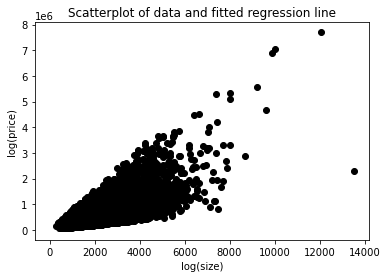

In [97]:
plot_results(intercept, slope)

Batch training

In [100]:
for batch in pd.read_csv("kc_house_data.csv", chunksize = 100):
    price = np.array(batch["price"], np.float32)

In [102]:
price

array([1537000.,  467000.,  224000.,  507250.,  429000.,  610685.,
       1007500.,  475000.,  360000.,  400000.,  402101.,  400000.,
        325000.], dtype=float32)

In [112]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
    # Define the predicted values
    return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets, features):
    # Define the predicted values
    predictions = linear_regression(intercept, slope, features)
    
    # Define the MSE loss
    return keras.losses.mse(targets, predictions)

In [113]:
# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    size_batch = np.array(batch['sqft_lot'], np.float32)

    # Extract the price values for the current batch
    price_batch = np.array(batch['price'], np.float32)

    # Complete the loss, fill in the variable list, and minimize
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016001


## NNs

In [123]:
inputs = tf.constant([[1.0, 35.0]], tf.float32)

In [124]:
weights = tf.Variable([[-0.05],[-0.01]], tf.float32)

In [125]:
bias = tf.Variable([0.5])

In [126]:
product = tf.matmul(inputs, weights)

In [127]:
dense = tf.keras.activations.sigmoid(product + bias)

In [161]:
# Initialize bias1
bias1 = tf.Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = tf.Variable(tf.ones((3,2)))

In [162]:
weights1

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [163]:
borrower_features = tf.cast([[ 2.,  2., 43.]], tf.float32)

In [164]:
# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features, weights1)

In [165]:
# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (1, 2)


In [170]:
# From previous step
bias1 = tf.Variable(1.0)
weights1 = tf.Variable(tf.ones((3, 2)))
product1 = tf.matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(tf.ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = tf.matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


In [183]:
weights1 = tf.cast(np.array([[-0.6 ,  0.6],[ 0.8 , -0.3],[-0.09, -0.08]]), tf.float32)

In [184]:
bias1 = tf.cast(np.array([0.1]), tf.float32)

In [187]:
borrower_featues = tf.cast(np.array([[ 3.,  3., 23.],[ 2.,  1., 24.],[ 1.,  1., 49.],[ 1.,  1., 49.],[ 2.,  1., 29.]]), tf.float32)

In [189]:
# Compute the product of borrower_features and weights1
products1 = tf.matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_featues.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (5, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (1, 2)


In [191]:
dense1.numpy()

array([[0.0332463 , 0.06065392]], dtype=float32)

In [192]:
products1.numpy()

array([[-3.4700003, -2.8399997]], dtype=float32)

In [194]:
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (1, 7)

 shape of dense2:  (1, 3)

 shape of predictions:  (1, 1)


Activation functions

In [ ]:
# Construct input layer from features
inputs = keras.layers.Input()

# Define first dense layer
dense1 = keras.layers.Dense(16, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(2, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

In [195]:
cc_data = pd.read_csv("uci_credit_card.csv")

In [196]:
cc_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [198]:
cc_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0


In [203]:
np.array(cc_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]], np.float32)

array([[ 3913.,  3102.,   689.,     0.,     0.,     0.],
       [ 2682.,  1725.,  2682.,  3272.,  3455.,  3261.],
       [29239., 14027., 13559., 14331., 14948., 15549.],
       ...,
       [ 3565.,  3356.,  2758., 20878., 20582., 19357.],
       [-1645., 78379., 76304., 52774., 11855., 48944.],
       [47929., 48905., 49764., 36535., 32428., 15313.]], dtype=float32)

In [204]:
bill_amount = np.array(cc_data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]], np.float32)

In [205]:
default = np.array(cc_data["default.payment.next.month"], np.float32)

In [211]:
bill_amount.shape

(30000, 6)

In [218]:
# Construct input layer from features
inputs = tf.constant(bill_amount, tf.float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[ 0.  0. -1. -1. -1.]
 [ 0.  0. -1. -1. -1.]
 [ 0.  0. -1. -1. -1.]
 [ 0.  0. -1. -1. -1.]
 [ 0.  0. -1. -1. -1.]]


In [220]:
# Construct input layer from borrower features
inputs = tf.constant(bill_amount, tf.float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.19619724 0.12194616 0.1800152  0.10975666 0.22283009 0.1692547 ]
 [0.14923815 0.14624973 0.16514073 0.1375382  0.22956817 0.17226502]
 [0.14923815 0.14624973 0.16514073 0.1375382  0.22956817 0.17226502]
 [0.19619724 0.12194616 0.1800152  0.10975666 0.22283009 0.1692547 ]
 [0.07606713 0.10268036 0.31739843 0.115016   0.29474622 0.09409196]]


In [224]:
def model(bias, weights, features = bill_amount):
    product = tf.matmul(features, weights)
    return tf.keras.activations.sigmoid(product + bias)

In [225]:
def loss_function(bias, weights, targets = default, features = bill_amount):
    predictions = model(bias,weights)
    return keras.losses.binary_crossentropy(targets, predictions)

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.001, momentum = 0.9)
opt.minimize(lambda: loss_function(bias, weights), var_list = [bias, weights])

In [240]:
def loss_function(x):
        return 4.0*math.cos(x-1)+divide(math.cos(2.0*pi*x),x)

In [245]:
pi = 3.141592653589793

In [246]:
# Initialize x_1 and x_2
x_1 = tf.Variable(6.0,tf.float32)
x_2 = tf.Variable(0.3,tf.float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
    # Perform minimization using the loss function and x_1
    opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Perform minimization using the loss function and x_2
    opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


In [249]:
# Initialize x_1 and x_2
x_1 = tf.Variable(0.05,tf.float32)
x_2 = tf.Variable(0.05,tf.float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.7445114 0.24999999


In [256]:
# Define the layer 1 weights
w1 = tf.Variable(np.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]))

# Define the layer 2 weights
w2 = tf.Variable(np.random.normal([7, 1]))

# Define the layer 2 bias
b2 = tf.Variable(0.0)

In [261]:
b2

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [263]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
    # Apply relu activation functions to layer 1
    layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
    dropout = keras.layers.Dropout(0.25)(layer1)
    return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
    predictions = model(w1, b1, w2, b2)
    # Pass targets and predictions to the cross entropy loss
    return keras.losses.binary_crossentropy(targets, predictions)

## Functional API

In [274]:
model = keras.Sequential()

In [275]:
model.add(keras.layers.Dense(16, activation = "relu", input_shape = (28*28,)))

In [276]:
model.add(keras.layers.Dense(8, activation = "relu"))

In [277]:
model.add(keras.layers.Dense(4, activation = "softmax"))

In [278]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [279]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


In [280]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation = "softmax"))

# Print the model architecture
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


In [281]:
# Define the first dense layer
model.add(keras.layers.Dense(16, activation = "sigmoid", input_shape = (784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4, activation = "softmax"))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_22 (Dense)             (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 68        
Total params: 12,880
Trainable params: 12,880
Non-trainable params: 0
__________________________________________________

In [ ]:
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

In [326]:
sign_data = pd.read_csv("slmnist.csv", header = None)

In [327]:
sign_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,142,143,146,148,149,149,149,150,151,...,0,15,55,63,37,61,77,65,38,23
1,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
2,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
3,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185
4,1,156,160,164,168,172,175,178,180,182,...,108,107,106,110,111,108,108,102,84,70


In [328]:
sign_language_labels = sign_data[0]

In [329]:
sign_language_labels.head()

0    1
1    0
2    1
3    3
4    1
Name: 0, dtype: int64

In [330]:
sign_language_features = sign_data[sign_data.columns.difference([0])]

In [331]:
sign_language_features.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,142,143,146,148,149,149,149,150,151,151,...,0,15,55,63,37,61,77,65,38,23
1,141,142,144,145,147,149,150,151,152,154,...,173,179,179,180,181,181,182,182,183,183
2,156,157,160,162,164,166,169,171,171,171,...,181,197,195,193,193,191,192,198,193,182
3,63,26,65,86,97,106,117,123,128,132,...,175,179,180,182,183,183,184,185,185,185
4,156,160,164,168,172,175,178,180,182,183,...,108,107,106,110,111,108,108,102,84,70


In [332]:
sign_language_features = sign_language_features.astype(np.float64) / 255.0

In [333]:
sign_language_features.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.556863,0.560784,0.572549,0.580392,0.584314,0.584314,0.584314,0.588235,0.592157,0.592157,...,0.000000,0.058824,0.215686,0.247059,0.145098,0.239216,0.301961,0.254902,0.149020,0.090196
1,0.552941,0.556863,0.564706,0.568627,0.576471,0.584314,0.588235,0.592157,0.596078,0.603922,...,0.678431,0.701961,0.701961,0.705882,0.709804,0.709804,0.713725,0.713725,0.717647,0.717647
2,0.611765,0.615686,0.627451,0.635294,0.643137,0.650980,0.662745,0.670588,0.670588,0.670588,...,0.709804,0.772549,0.764706,0.756863,0.756863,0.749020,0.752941,0.776471,0.756863,0.713725
3,0.247059,0.101961,0.254902,0.337255,0.380392,0.415686,0.458824,0.482353,0.501961,0.517647,...,0.686275,0.701961,0.705882,0.713725,0.717647,0.717647,0.721569,0.725490,0.725490,0.725490
4,0.611765,0.627451,0.643137,0.658824,0.674510,0.686275,0.698039,0.705882,0.713725,0.717647,...,0.423529,0.419608,0.415686,0.431373,0.435294,0.423529,0.423529,0.400000,0.329412,0.274510


In [334]:
sign_language_labels_onehot = tf.one_hot(sign_language_labels, depth = 4)

In [335]:
sign_language_labels_onehot

<tf.Tensor: shape=(2000, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)>

In [336]:
sign_language_labels_onehot = tf.cast(sign_language_labels_onehot, dtype = tf.float32)

In [337]:
sign_language_features = tf.cast(sign_language_features, dtype = tf.float32)

In [340]:
sign_language_labels_onehot

<tf.Tensor: shape=(2000, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)>

In [339]:
sign_language_features

<tf.Tensor: shape=(2000, 784), dtype=float32, numpy=
array([[0.5568628 , 0.56078434, 0.57254905, ..., 0.25490198, 0.14901961,
        0.09019608],
       [0.5529412 , 0.5568628 , 0.5647059 , ..., 0.7137255 , 0.7176471 ,
        0.7176471 ],
       [0.6117647 , 0.6156863 , 0.627451  , ..., 0.7764706 , 0.75686276,
        0.7137255 ],
       ...,
       [0.69411767, 0.7019608 , 0.7058824 , ..., 0.9372549 , 0.9137255 ,
        0.9411765 ],
       [0.4745098 , 0.5058824 , 0.5411765 , ..., 0.77254903, 0.7764706 ,
        0.827451  ],
       [0.69803923, 0.69803923, 0.69803923, ..., 0.7647059 , 0.7607843 ,
        0.7529412 ]], dtype=float32)>

In [343]:
# Define a sequential model
model = keras.Sequential()

# Define a hidden layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(keras.layers.Dense(4, activation = "softmax"))

# Compile the model
model.compile('SGD', loss='categorical_crossentropy')

# Complete the fitting operation
model.fit(sign_language_features, sign_language_labels_onehot, epochs=100)

Epoch 1/100
63/63 [==============================] - 0s 815us/step - loss: 1.3222
Epoch 2/100
63/63 [==============================] - 0s 812us/step - loss: 1.0405
Epoch 3/100
63/63 [==============================] - 0s 875us/step - loss: 0.8152
Epoch 4/100
63/63 [==============================] - 0s 778us/step - loss: 0.6637
Epoch 5/100
63/63 [==============================] - 0s 882us/step - loss: 0.5666
Epoch 6/100
63/63 [==============================] - 0s 872us/step - loss: 0.4994
Epoch 7/100
63/63 [==============================] - 0s 809us/step - loss: 0.4455
Epoch 8/100
63/63 [==============================] - 0s 815us/step - loss: 0.4032
Epoch 9/100
63/63 [==============================] - 0s 775us/step - loss: 0.3636
Epoch 10/100
63/63 [==============================] - 0s 776us/step - loss: 0.3269
Epoch 11/100
63/63 [==============================] - 0s 773us/step - loss: 0.2923
Epoch 12/100
63/63 [==============================] - 0s 780us/step - loss: 0.2597
Epoch 13/100


63/63 [==============================] - 0s 745us/step - loss: 0.0081
Epoch 100/100
63/63 [==============================] - 0s 776us/step - loss: 0.0080


In [344]:
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(32, activation = "sigmoid", input_shape = (784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Set the optimizer, loss function, and metrics
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Add the number of epochs and the validation split
model.fit(sign_language_features, sign_language_labels_onehot, epochs=10, validation_split=0.1)

Epoch 1/10
57/57 [==============================] - 0s 4ms/step - loss: 1.1362 - accuracy: 0.5578 - val_loss: 1.0676 - val_accuracy: 0.4600
Epoch 2/10
57/57 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.8000 - val_loss: 0.8249 - val_accuracy: 0.7300
Epoch 3/10
57/57 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.8700 - val_loss: 0.5706 - val_accuracy: 0.8600
Epoch 4/10
57/57 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.9122 - val_loss: 0.5038 - val_accuracy: 0.7600
Epoch 5/10
57/57 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.9444 - val_loss: 0.3781 - val_accuracy: 0.8400
Epoch 6/10
57/57 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.9506 - val_loss: 0.2649 - val_accuracy: 0.9650
Epoch 7/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9689 - val_loss: 0.4132 - val_accuracy: 0.8100
Epoch 8/10
57/57 [==

In [345]:
# Define sequential model
model = keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(1024, activation='relu', input_shape = (784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Finish the model compilation
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the model fit operation
model.fit(sign_language_features, sign_language_labels_onehot, epochs=50, validation_split=0.5)

Epoch 1/50
32/32 [==============================] - 0s 7ms/step - loss: 1.0580 - accuracy: 0.6050 - val_loss: 0.5830 - val_accuracy: 0.7490
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.8810 - val_loss: 0.2953 - val_accuracy: 0.8920
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2281 - accuracy: 0.9760 - val_loss: 0.3124 - val_accuracy: 0.8390
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.9640 - val_loss: 0.1461 - val_accuracy: 0.9680
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1325 - accuracy: 0.9720 - val_loss: 0.1804 - val_accuracy: 0.9650
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0910 - accuracy: 0.9890 - val_loss: 0.1035 - val_accuracy: 0.9830
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9960 - val_loss: 0.0725 - val_accuracy: 0.9810
Epoch 8/50
32/32 [==

You may have noticed that the validation loss, val_loss, was substantially higher than the training loss, loss. Furthermore, if val_loss started to increase before the training process was terminated, then we may have overfitted. When this happens, you will want to try decreasing the number of epochs.

In [346]:
model_evaluation = model.evaluate(sign_language_features, sign_language_labels_onehot)

# Print losses
print('\n Model - Train: {}'.format(model_evaluation))

63/63 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000

 Model - Train: [0.0020089601166546345, 1.0]
